# CAPSTONE PROJECT - PART TWO

# ACCOMODATION IN ACCRA

# INTRODUCTION

## Background of the Project

The United Nations Sustainable Development Goals includes a target for making cities and human
settlements inclusive, safe, resilient, and sustainable (Goal 11). A key outcome of this goal is to
provide opportunities for safe and affordable housing. The housing situation in Ghana is far from
the SDG target described above. As a result, it would be interesting to investigate the housing
situation in Ghana and provide an understanding of the housing situation. The goal of this project
therefore, is to use such an understanding to provide a description of places in the country that
provide the best options for budget accommodation. The insights from this project can be useful
for not only policy makers, but also for young people making the decision to move to some part
of the country to start their working lives.

## Description of Dataset

This project faces several constraints and opportunities. There are not so many well-known or
readily available datasets to help study the accommodation phenomenon to arrive at the goal
described above

## Goal of the project

The main goal of the project is to find the areas in the Greater Accra Region with the most affordable accommodation

### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing a few more libraries to make sure we display interactive visualization

The use the interactive visualization library please install Plotly and Cufflinks in you anaconda command prompt
<br>
pip install plotly
<br>
pip install cufflinks

In [2]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Loading the dataset

In [3]:
df = pd.read_excel('accra_housing_dataset.xlsx')
df.head()

,property_id,price,categories,bedrooms,bathrooms,garage,area,location,amenities,furnished
0,1606888774-383,16800,Apartment for Rent,2,2,2,151,Dzorwulu,Listed,Furnished
1,1606888783-385,15525,Apartment for Rent,3,3,2,216,Airport Residential,Listed,Not Furnished
2,1606888789-386,15525,Apartment for Rent,2,2,0,130,Cantoment accra,Listed,Furnished
3,1606888795-387,10878,Apartment for Rent,2,2,0,115,Cantoment accra,Listed,Furnished
4,1606888803-389,8158,Apartment for Rent,1,1,0,51,Cantoment accra,Listed,Furnished


In [4]:
df.sample(5)

,property_id,price,categories,bedrooms,bathrooms,garage,area,location,amenities,furnished
1901,1606905212-6061,20124,Apartment for Rent,3,2,2,216,Airport Area,Listed,Furnished
2227,1606909191-7322,2719,Apartment for Rent,2,3,0,115,"Spintex, Greater Accra",Listed,Not Furnished
2159,1606908101-7028,1500,Apartment for Rent,2,3,0,115,"Spintex, Greater Accra",Listed,Not Furnished
2259,1606909618-7443,900,Apartment for Rent,1,1,0,51,East Legon,Not Listed,Not Furnished
203,1606890686-799,14318,Apartment for Rent,4,3,0,265,Cantoment accra,Listed,Not Furnished


## Exploring the dataset

In [5]:
df.shape

(2304, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   property_id  2304 non-null   object
 1   price        2304 non-null   int64 
 2   categories   2304 non-null   object
 3   bedrooms     2304 non-null   int64 
 4   bathrooms    2304 non-null   int64 
 5   garage       2304 non-null   int64 
 6   area         2304 non-null   int64 
 7   location     2304 non-null   object
 8   amenities    2304 non-null   object
 9   furnished    2304 non-null   object
dtypes: int64(5), object(5)
memory usage: 180.1+ KB


In [7]:
df.dtypes

property_id    object
price           int64
categories     object
bedrooms        int64
bathrooms       int64
garage          int64
area            int64
location       object
amenities      object
furnished      object
dtype: object

In [8]:
df.isna().sum()

property_id    0
price          0
categories     0
bedrooms       0
bathrooms      0
garage         0
area           0
location       0
amenities      0
furnished      0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,2304.0,11820.618490,5720.656190,350.0,8158.0,11830.0,15229.0,54389.0
bedrooms,2304.0,2.026476,0.947924,1.0,1.0,2.0,3.0,5.0
bathrooms,2304.0,2.047309,0.957146,1.0,1.0,2.0,3.0,6.0
garage,2304.0,0.792101,0.929895,0.0,0.0,0.0,2.0,5.0
area,2304.0,126.723958,76.789912,20.0,51.0,115.0,216.0,360.0


In [10]:
df.describe(exclude='number').transpose()

,count,unique,top,freq
property_id,2304,2304,1606893715-1829,1
categories,2304,2,Apartment for Rent,2300
location,2304,83,Cantoment accra,981
amenities,2304,2,Listed,2102
furnished,2304,2,Furnished,1343


In [11]:
print('Unique values this price columns:\n', df['price'].unique())
print('\n')
print('Unique values this bedrooms columns:\n', df['bedrooms'].unique())
print('\n')
print('Unique values this bathrooms columns:\n', df['bathrooms'].unique())
print('\n')
print('Unique values this garage columns:\n', df['garage'].unique())
print('\n')
print('Unique values this area columns:\n', df['area'].unique())

Unique values this price columns:
 [16800 15525 10878  8158  5462  7993 20125  8021 14375 15229 11966  6142
  8913  8974 14318 10638  2500  9488 24475 19036 21756 13597 18112 16962
 10350 22138 18400  6760 13800 22712 14950 13053  5256 18688 10235 14317
 12650 17825 10867  9142 23000 16963  9790  7150 20700  7420 23575 18975
 10063  9200  5750 11500  8050  7418 12075 13743 23863 14895 10295  4380
 16317  6325 15623  6840  7475 25875  5175  1500  9246 23115 23387 29914
  4200 20124 32633 20668 17404  4079 15501 27195 28826 38072 15773 10334
 35353 22843 26107  8702 12509  1441  4351  7614  6527 40792  1200 19580
 17948 28282 14685   350   450 15392 11694   800  5439  1000  1958  2000
 15000  1800  2719  3200 20940  5983  2200  1700  3807  3000  4623  1600
  3263  1350  3535  3500  2700 14957  2750  2300   850  2991 22000 54389
  1400  4895  1300  2448  1632  3800  1360  4000   900   650 11600  6000
  2400]


Unique values this bedrooms columns:
 [2 3 1 4 5]


Unique values this bathroom

# DATA VISUALIZATION AND ANALYSIS

## Visualizing the Location of the Apartments

In [12]:
from wordcloud import WordCloud

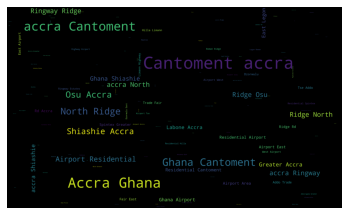

In [13]:
texts = " ".join(location for location in df.location)

wordcloud = WordCloud(width=3000,height=1800,margin=1,max_font_size=150).generate(texts)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
wordcloud.to_file('wordcloud.jpg')

## An interactive visualization for the entire dataset

In [15]:
df.iplot()

## A visualization for all numerical columns

In [16]:
df[['price','bedrooms','bathrooms','garage','area']].iplot()

## Visualizing the distribution of the price of accommodation in Accra

In [17]:
df['price'].iplot(kind='box',title='Distribution of Price')

In [18]:
df['price'].iplot(kind='hist',bins=15,title='Distribution of Price')

## A bubble plot of the price and number of bedrooms
This chart below is a bubble plot of the price and number of bedrooms, where the area was used as a size of the bubble. The larger the area the bigger the bubble

In [19]:
df.iplot(kind='bubble',x='bedrooms',y='price',size='area')

## The distribution of price and other numerical columns

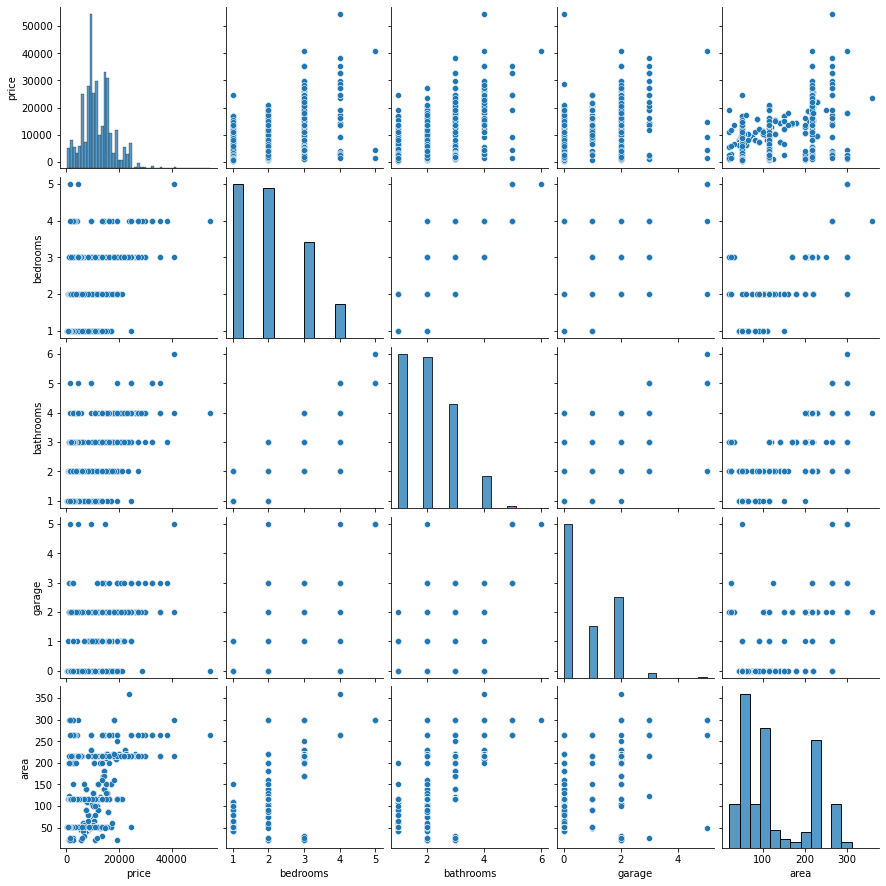

In [20]:
sns.pairplot(df)

Text(0.5, 1.0, 'bedrooms Vs Price')

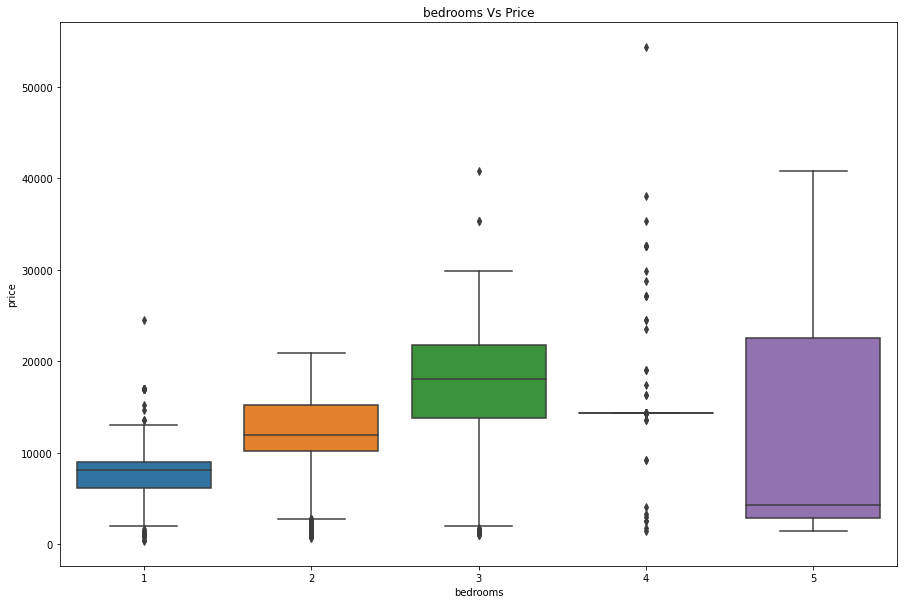

In [21]:
fig, axis = plt.subplots(1,1, figsize = (15,10))
sns.boxplot(data=df, x = 'bedrooms', y = 'price')
axis.set_title('bedrooms Vs Price' )

Text(0.5, 1.0, 'bathrooms Vs Price')

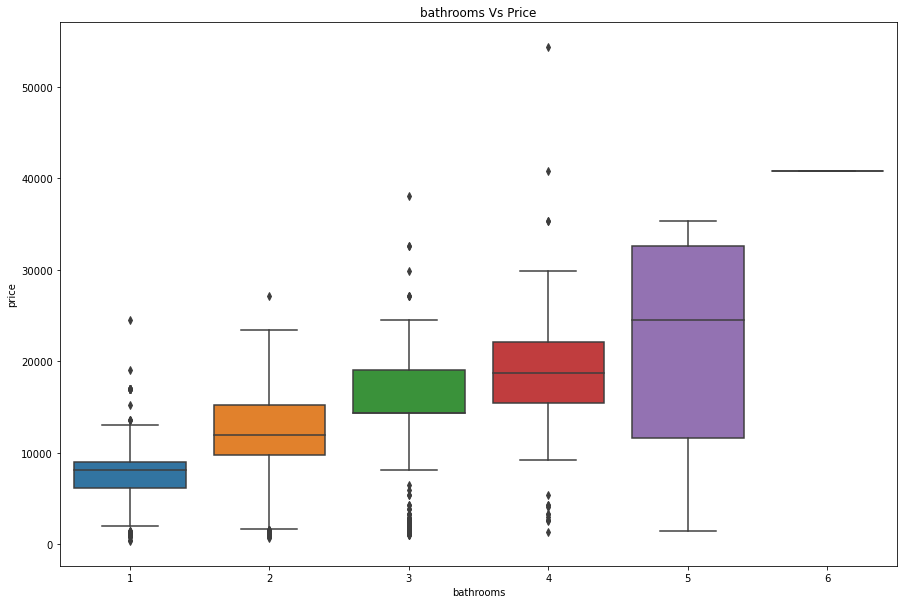

In [22]:
fig, axis = plt.subplots(1,1, figsize = (15,10))
sns.boxplot(data=df, x = 'bathrooms', y = 'price')
axis.set_title('bathrooms Vs Price' )

Text(0.5, 1.0, 'area Vs Price')

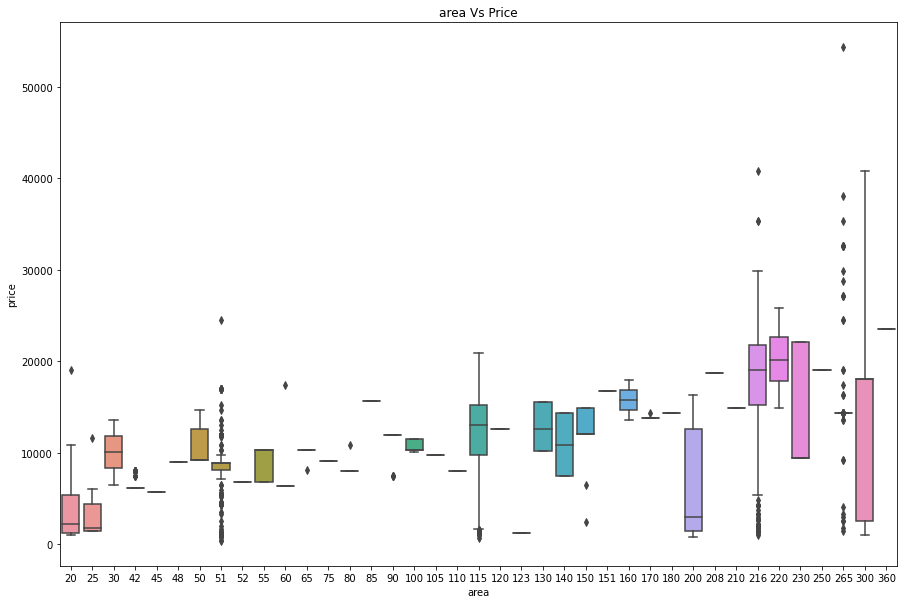

In [23]:
fig, axis = plt.subplots(1,1, figsize = (15,10))
sns.boxplot(data=df, x = 'area', y = 'price')
axis.set_title('area Vs Price' )

Text(0.5, 1.0, 'garage Vs Price')

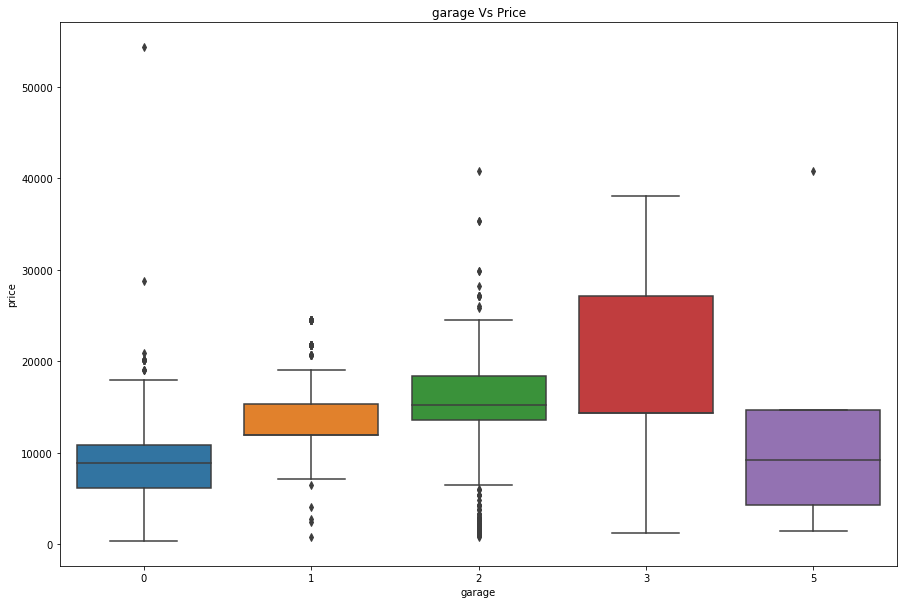

In [24]:
fig, axis = plt.subplots(1,1, figsize = (15,10))
sns.boxplot(data=df, x = 'garage', y = 'price')
axis.set_title('garage Vs Price' )

# Relation between Price and Numerical Varables

In [25]:
df.corr()

,price,bedrooms,bathrooms,garage,area
price,1.000000,0.565601,0.612738,0.492104,0.574802
bedrooms,0.565601,1.000000,0.879684,0.507718,0.945031
bathrooms,0.612738,0.879684,1.000000,0.579411,0.865909
garage,0.492104,0.507718,0.579411,1.000000,0.504203
area,0.574802,0.945031,0.865909,0.504203,1.000000


In [26]:
df.iplot(kind='scatter',x='price',y='bedrooms',mode='markers',xTitle='Price per month',yTitle='No. of Bedrooms')

In [27]:
df.iplot(kind='scatter',x='price',y='bathrooms',mode='markers',xTitle='Price per month',yTitle='No. of Bathrooms')

In [28]:
df.iplot(kind='scatter',x='price',y='area',mode='markers',xTitle='Price per month',yTitle='Size of floor area (in meter square)')

In [29]:
df.iplot(kind='scatter',x='price',y='garage',mode='markers',xTitle='Price per month',yTitle='No. of garage')

# Visualizing counts of categorical columns

In [30]:
df.furnished.value_counts().iplot(kind='bar',xTitle='Furnishing Status',yTitle='No. of Occurances')

In [31]:
df.amenities.value_counts().iplot(kind='bar',xTitle='Amenities', yTitle='No. of Occurrence')

In [32]:
df.location.value_counts().iplot(kind='barh',xTitle='No. of Occurrence')

# Visualization Locations with affordable apartments

In [33]:
aver_price_locations = df.groupby(['bedrooms','location'],sort=True).mean().reset_index()

In [34]:
one_br = aver_price_locations[aver_price_locations.bedrooms==1].sort_values(by=['price'])
two_br = aver_price_locations[aver_price_locations.bedrooms==2].sort_values(by=['price'])
three_br = aver_price_locations[aver_price_locations.bedrooms==3].sort_values(by=['price'])
four_br = aver_price_locations[aver_price_locations.bedrooms==4].sort_values(by=['price'])
five_br = aver_price_locations[aver_price_locations.bedrooms==5].sort_values(by=['price'])

## One-bedroom apartments (Location and Price)

In [35]:
one_br.head()

,bedrooms,location,price,bathrooms,garage,area
16,1,Race Course,400.0,1.0,0.0,51.0
6,1,Haatso,800.0,1.0,1.0,51.0
21,1,Tema Motorway,800.0,1.0,0.0,51.0
15,1,Pobiman off Nsawam road,1000.0,1.0,0.0,51.0
9,1,Lakeside Estate,1000.0,2.0,0.0,51.0


In [36]:
one_br.iplot(kind='barh',x='location',y='price',title='One Bedroom Apartments',xTitle='price')

## Two-bedrooms apartments (Location and Price)

In [37]:
two_br.head()

,bedrooms,location,price,bathrooms,garage,area
85,2,Tema Motorway,650.0,2.0,0.0,115.0
45,2,Awoshie Anya Accra,1000.0,2.0,2.0,20.0
43,2,"Ashongman, Greater Accra",1000.0,3.0,0.0,115.0
50,2,"Circle, odo rice, Greater Accra",1000.0,2.0,2.0,200.0
74,2,"Pokuase, Greater Accra, Ghana",1000.0,3.0,2.0,300.0


In [38]:
two_br.iplot(kind='barh',x='location',y='price',title='Two Bedroom Apartments',xTitle='price')

## Three-bedrooms apartments (Location and Price)

In [39]:
three_br.head()

,bedrooms,location,price,bathrooms,garage,area
108,3,"Dansoman, Greater Accra",1000.0,2.0,2.0,200.0
106,3,"Ashaley Botwe, Greater Accra",1000.0,2.0,2.0,216.0
99,3,"Agbogba, Greater Accra",1300.0,2.0,2.0,216.0
117,3,Ofankor,1300.0,4.0,2.0,200.0
94,3,"Abelemkpe, Accra",1500.0,3.0,2.0,25.0


In [40]:
three_br.iplot(kind='barh',x='location',y='price',title='Three Bedroom Apartments',xTitle='price')

## Four-bedrooms apartments (Location and Price)

In [41]:
four_br.head()

,bedrooms,location,price,bathrooms,garage,area
140,4,Teshie,1400.000000,3.00000,0.000000,265.000000
137,4,Ofankor,2500.000000,4.00000,0.000000,265.000000
139,4,"Spintex, Greater Accra",2640.750000,3.25000,0.000000,265.000000
132,4,Airport Hills,14032.200000,3.40000,2.200000,265.000000
135,4,Cantoment accra,15120.291139,3.14557,0.449367,265.601266


In [42]:
four_br.iplot(kind='barh',x='location',y='price',title='Four Bedroom Apartments',xTitle='price')

## Five-bedrooms apartments (Location and Price)

In [43]:
five_br.head()

,bedrooms,location,price,bathrooms,garage,area
143,5,Madina,1500.0,5.0,5.0,300.0
141,5,"Achimota Mile 7, Greater Accra",4351.0,5.0,5.0,300.0
142,5,Airport City,40792.0,6.0,5.0,300.0


In [44]:
five_br.iplot(kind='barh',x='location',y='price',title='Five Bedroom Apartments',xTitle='price')

# INSIGHT FROM THE DATA

VARIABLE THAT INFLUENCE THE PRICES OF ACCOMMODATION IN ACCRA
<br>
Some of the variable that influence the prices of accommodation in Accra includes
<br>
1. Location of the accommodation
<br>
2. The availability of the amenities
<br>

Other factors includes the following

3. The number of Bedrooms
<br>
4. The floor area measured in meter squared
<br>
5. The Number of garages

# CONCLUSION

From the analysis and insight generated, we have learnt that there are various options for you if you need to rent accommodation in Accra. Some of the main factors that influence the price of accommodation in Accra is the location, the availability of amenities. The number of bedrooms and the size floor area only has a mid positive effect the price of accommodation.
<br>
It also goes without saying that at every price within the range of the dataset there is an available option except that you may have to sacrifice on some amenities and cater for furnishing the apartment. The location of the accommodation will also determine how much your pay per month.